In [2]:
import geopandas

In [3]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

In [4]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


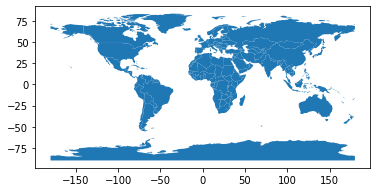

In [6]:
world.plot()

In [7]:
world.geometry.name

'geometry'

In [8]:
world = world.rename(columns={'geometry': 'borders'}).set_geometry('borders')

In [9]:
world.geometry.name

'borders'

In [10]:
world['centroid_column'] = world.centroid

In [11]:
world = world.set_geometry('centroid_column')

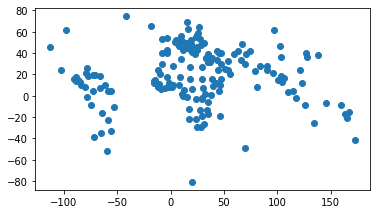

In [12]:
world.plot()

In [13]:
geopandas.options

Options(
  display_precision: None [default: None]
      The precision (maximum number of decimals) of the coordinates in the
      WKT representation in the Series/DataFrame display. By default (None),
      it tries to infer and use 3 decimals for projected coordinates and 5
      decimals for geographic coordinates.)

In [14]:
world['centroid_column'].head()

0    POINT (163.85316 -17.31631)
1      POINT (34.75299 -6.25773)
2     POINT (-12.13783 24.29117)
3     POINT (-98.14238 61.46908)
4    POINT (-112.59944 45.70563)
Name: centroid_column, dtype: geometry

In [16]:
import fiona

In [17]:
help(fiona.open)

Help on function open in module fiona:

open(fp, mode='r', driver=None, schema=None, crs=None, encoding=None, layer=None, vfs=None, enabled_drivers=None, crs_wkt=None, **kwargs)
    Open a collection for read, append, or write
    
    In write mode, a driver name such as "ESRI Shapefile" or "GPX" (see
    OGR docs or ``ogr2ogr --help`` on the command line) and a schema
    mapping such as:
    
      {'geometry': 'Point',
       'properties': [('class', 'int'), ('label', 'str'),
                      ('value', 'float')]}
    
    must be provided. If a particular ordering of properties ("fields"
    in GIS parlance) in the written file is desired, a list of (key,
    value) pairs as above or an ordered dict is required. If no ordering
    is needed, a standard dict will suffice.
    
    A coordinate reference system for collections in write mode can be
    defined by the ``crs`` parameter. It takes Proj4 style mappings like
    
      {'proj': 'longlat', 'ellps': 'WGS84', 'datum': 'W

In [26]:
countries_gdf = geopandas.read_file("Uso_do_Solo_2018.shp",  encoding='utf-8')
countries_gdf.head()

,OBJECTID,UsoAgregad,Grupo,BaseGeoDBO,RuleID,Ano,RuleID_1,ShapeSTAre,ShapeSTLen,geometry
0,1,Afloramentos rochosos e depósitos sedimentares,Áreas não urbanizadas,8188.561687,1,2018,Afloramentos rochosos e depósitos sedimentares,8188.565918,337.744461,"POLYGON ((683594.243 7446263.712, 683562.743 7..."
1,2,Afloramentos rochosos e depósitos sedimentares,Áreas não urbanizadas,1357.095898,1,2018,Afloramentos rochosos e depósitos sedimentares,1357.094727,159.078568,"POLYGON ((646588.055 7446739.821, 646593.115 7..."
2,3,Afloramentos rochosos e depósitos sedimentares,Áreas não urbanizadas,90180.373013,1,2018,Afloramentos rochosos e depósitos sedimentares,90180.374023,1716.454932,"POLYGON ((647581.746 7446823.861, 647574.106 7..."
3,4,Afloramentos rochosos e depósitos sedimentares,Áreas não urbanizadas,36392.080374,1,2018,Afloramentos rochosos e depósitos sedimentares,36392.085449,733.208879,"POLYGON ((684643.345 7447154.513, 684594.184 7..."
4,5,Afloramentos rochosos e depósitos sedimentares,Áreas não urbanizadas,1909.486647,1,2018,Afloramentos rochosos e depósitos sedimentares,1909.486816,176.367232,"POLYGON ((648272.032 7447589.797, 648239.156 7..."


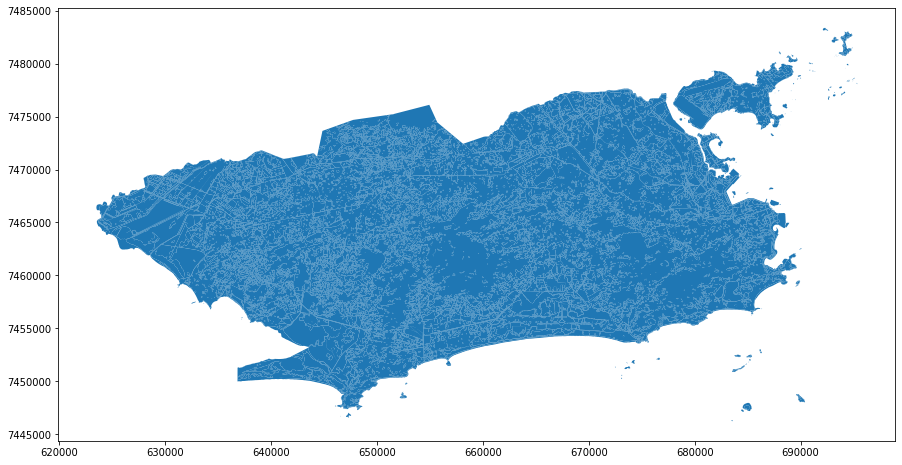

In [23]:
countries_gdf.plot(figsize=(15, 10))

In [24]:
countries_gdf.columns

Index(['OBJECTID', 'UsoAgregad', 'Grupo', 'BaseGeoDBO', 'RuleID', 'Ano',
       'RuleID_1', 'ShapeSTAre', 'ShapeSTLen', 'geometry'],
      dtype='object')

In [27]:
df = countries_gdf[countries_gdf.RuleID_1 == 'Afloramentos rochosos e depósitos sedimentares']


In [28]:
df.head()

,OBJECTID,UsoAgregad,Grupo,BaseGeoDBO,RuleID,Ano,RuleID_1,ShapeSTAre,ShapeSTLen,geometry
0,1,Afloramentos rochosos e depósitos sedimentares,Áreas não urbanizadas,8188.561687,1,2018,Afloramentos rochosos e depósitos sedimentares,8188.565918,337.744461,"POLYGON ((683594.243 7446263.712, 683562.743 7..."
1,2,Afloramentos rochosos e depósitos sedimentares,Áreas não urbanizadas,1357.095898,1,2018,Afloramentos rochosos e depósitos sedimentares,1357.094727,159.078568,"POLYGON ((646588.055 7446739.821, 646593.115 7..."
2,3,Afloramentos rochosos e depósitos sedimentares,Áreas não urbanizadas,90180.373013,1,2018,Afloramentos rochosos e depósitos sedimentares,90180.374023,1716.454932,"POLYGON ((647581.746 7446823.861, 647574.106 7..."
3,4,Afloramentos rochosos e depósitos sedimentares,Áreas não urbanizadas,36392.080374,1,2018,Afloramentos rochosos e depósitos sedimentares,36392.085449,733.208879,"POLYGON ((684643.345 7447154.513, 684594.184 7..."
4,5,Afloramentos rochosos e depósitos sedimentares,Áreas não urbanizadas,1909.486647,1,2018,Afloramentos rochosos e depósitos sedimentares,1909.486816,176.367232,"POLYGON ((648272.032 7447589.797, 648239.156 7..."


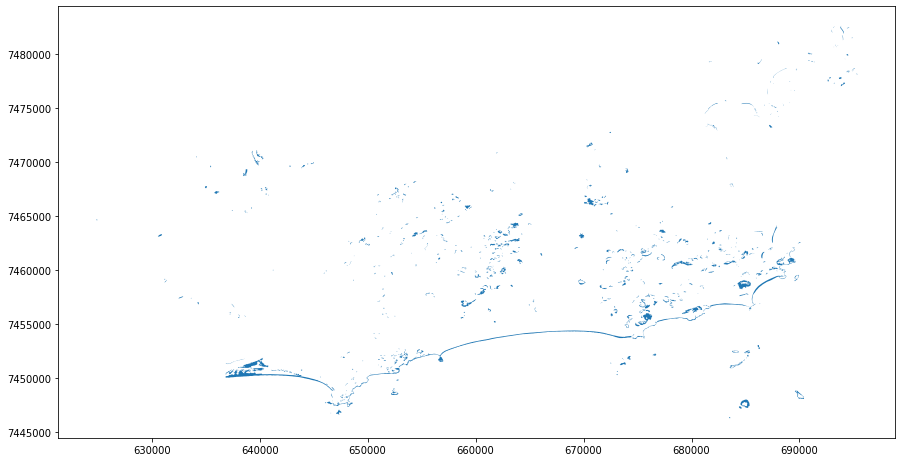

In [29]:
df.plot(figsize=(15, 10))